# Exploratory Data Analysis of Bank Data Churn

# Introduction

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

**Getting the data**

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Data Wrangling

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum().to_frame('No. of Nulls')

,No. of Nulls
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [8]:
df.dtypes.to_frame('Data Type')

,Data Type
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


Okay, data is clean and not null. 

# Exploratory Data Analysis

Response variable: **Exited**

## Summary Statistics

In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include='O')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


By looking at the statistics above, we can see that in geography, most people are from France. And most of them are males. 

<AxesSubplot:xlabel='Geography', ylabel='count'>

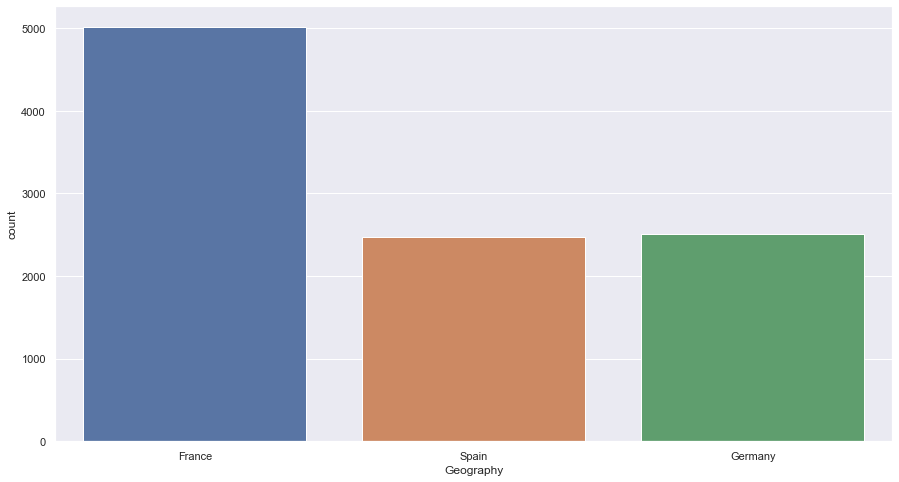

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Geography)

Now, for **Gender**.

<AxesSubplot:xlabel='Gender', ylabel='count'>

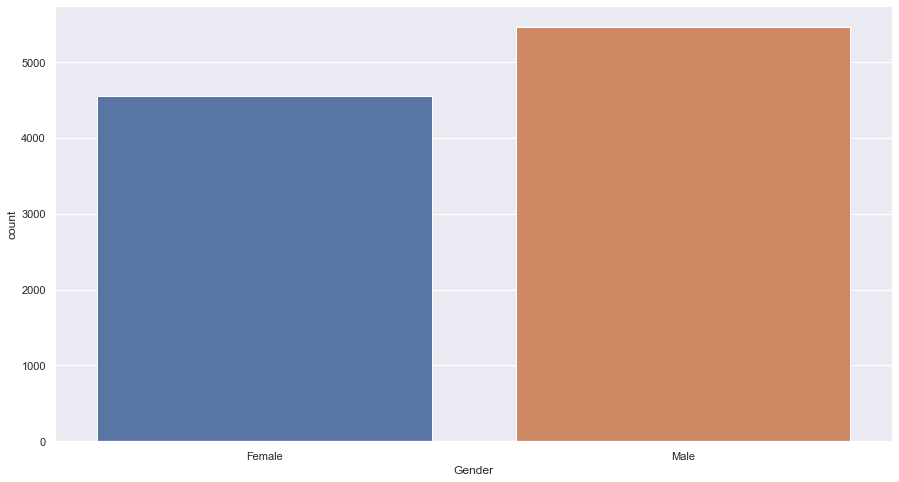

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Gender)

In [13]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


The visualizations above say the same thing as the summary statistics.

<AxesSubplot:>

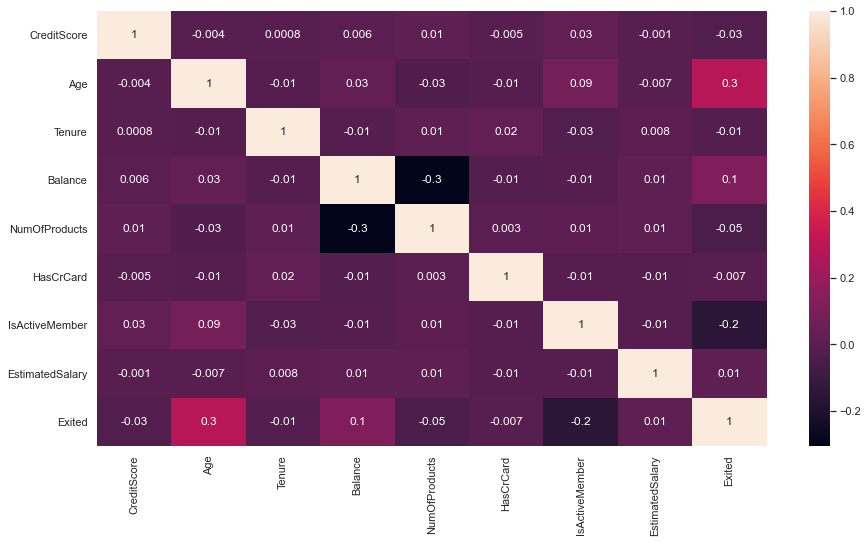

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.1g')

There appears to be very less correlation among all the columns. 

## Discriptive Analysis

### Credit Score

Let's check the distribution of Credit Score first.

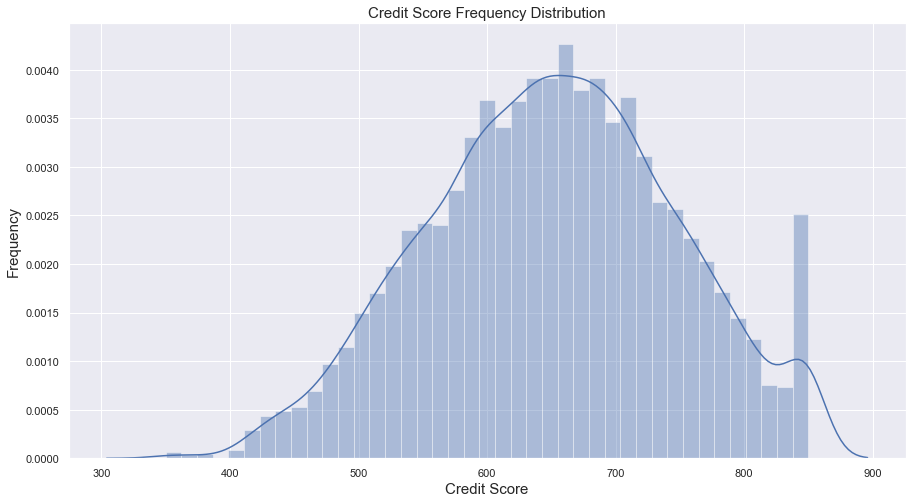

In [15]:
plt.figure(figsize=(15, 8))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

Most of the distributions are between 600 and 700.

Let's check the relation of credit score with geography.

In [16]:
list(df.Geography.unique())

['France', 'Spain', 'Germany']

<Figure size 1080x576 with 0 Axes>

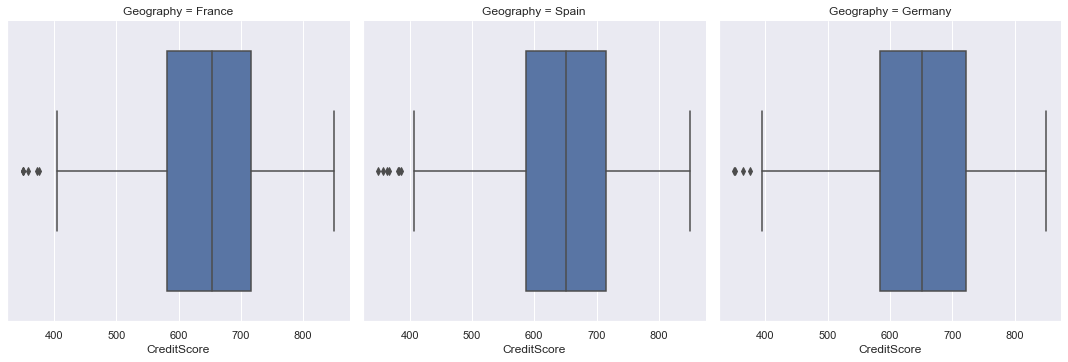

In [17]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', x='CreditScore', data=df, col='Geography')

Let's check the relation of credit score with gender.

<Figure size 1080x576 with 0 Axes>

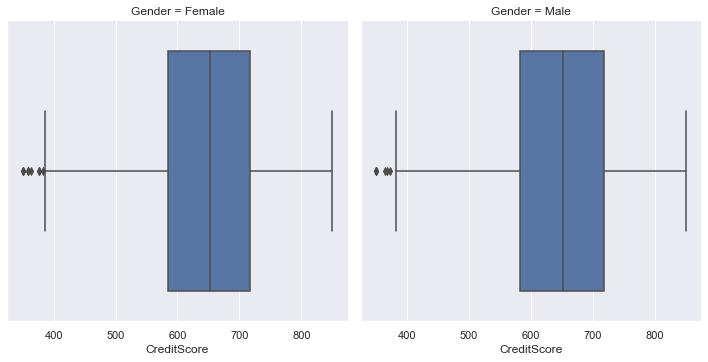

In [64]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='box', x='CreditScore', data=df, col='Gender')

Let's check the credit score with age.

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

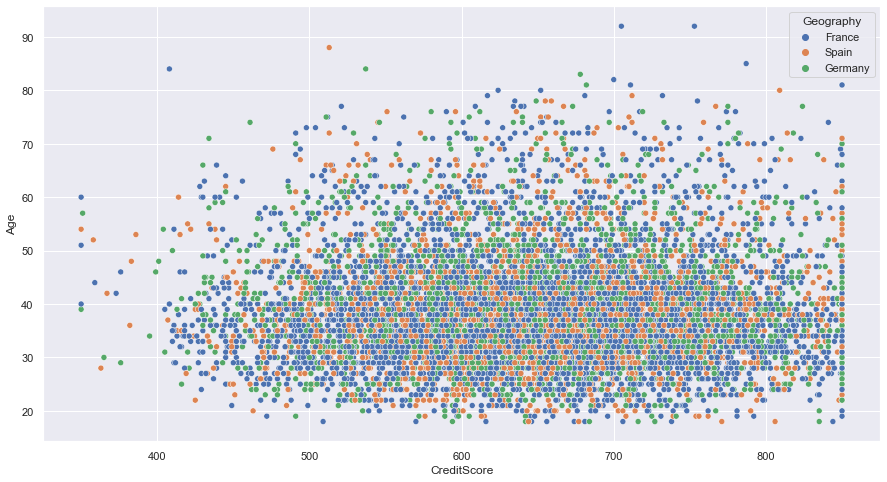

In [19]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CreditScore', data=df, y='Age',hue="Geography")

There appears to be no correlation among age and credit score.

In [20]:
df[['Age', 'CreditScore']].corr()

,Age,CreditScore
Age,1.000000,-0.003965
CreditScore,-0.003965,1.000000


Now, let's try to relate the Credit Score with the response variable.

##### count plot

<AxesSubplot:xlabel='Exited', ylabel='count'>

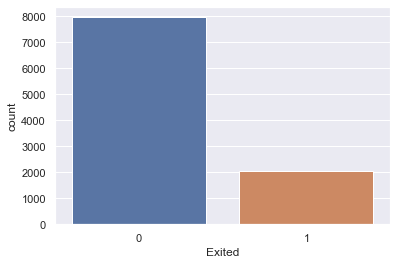

In [21]:
sns.countplot(x='Exited', data=df)

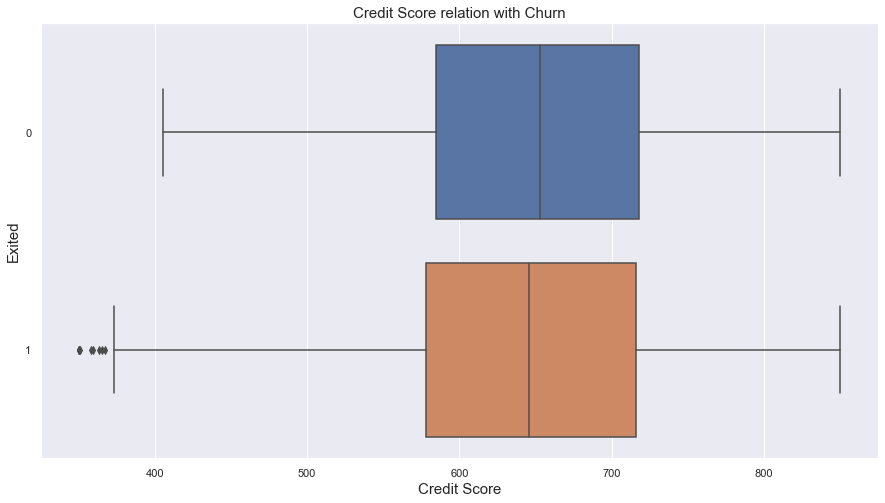

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='CreditScore', y='Exited', data=df, orient='h')
plt.xlabel('Credit Score', fontsize=15)
plt.ylabel('Exited', fontsize=15)
plt.title('Credit Score relation with Churn', fontsize=15)
plt.show()

Boxes are overlapping. there appears to be no visible relation between credit score and churn/exited.

### Geography

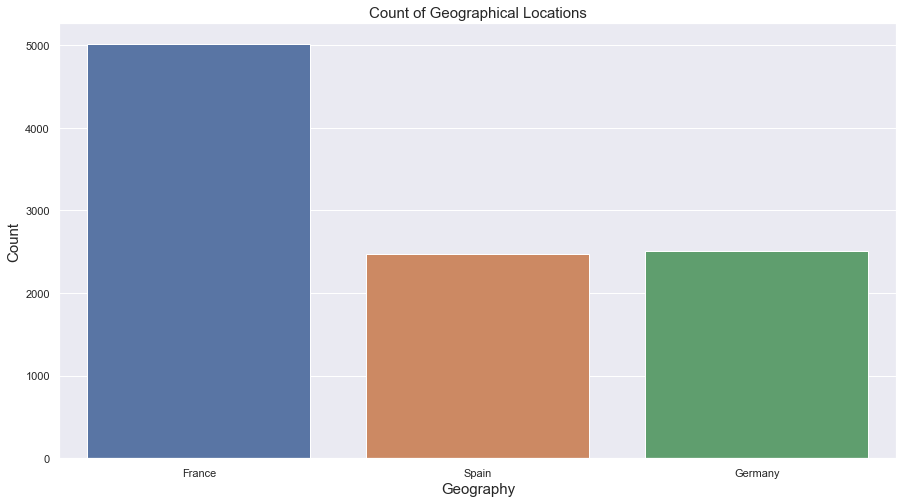

In [23]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Geography)
plt.xlabel('Geography', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Geographical Locations', fontsize=15)

plt.show()

Let's first try to see if there is any relation of Geography with Tenure. Perhaps, different countries have different tenures.

In [24]:
df[['Tenure', 'Geography']].dtypes

Tenure        int64
Geography    object
dtype: object

Let's look at the unique years of tenure first to get the idea.

In [25]:
print('Unique years of tenures:', list(np.sort(df.Tenure.unique())))

Unique years of tenures: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


So, people have tenures of 0 to 10 years.

Let's visualize the count of each tenure.

Text(0, 0.5, 'Count')

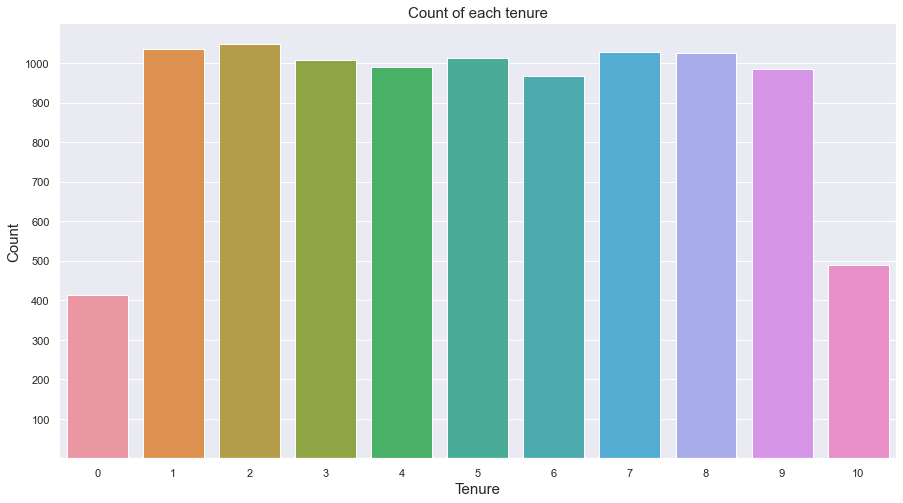

In [26]:

plt.figure(figsize=(15, 8))
sns.countplot(x=df.Tenure,)
plt.title('Count of each tenure', fontsize=15)
plt.yticks([100,200,300,400,500,600,700,800,900,1000])
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)

We can see that almost all the people have similar years of tenure mostly. However, there are a few people with less than a year or 10 years. 

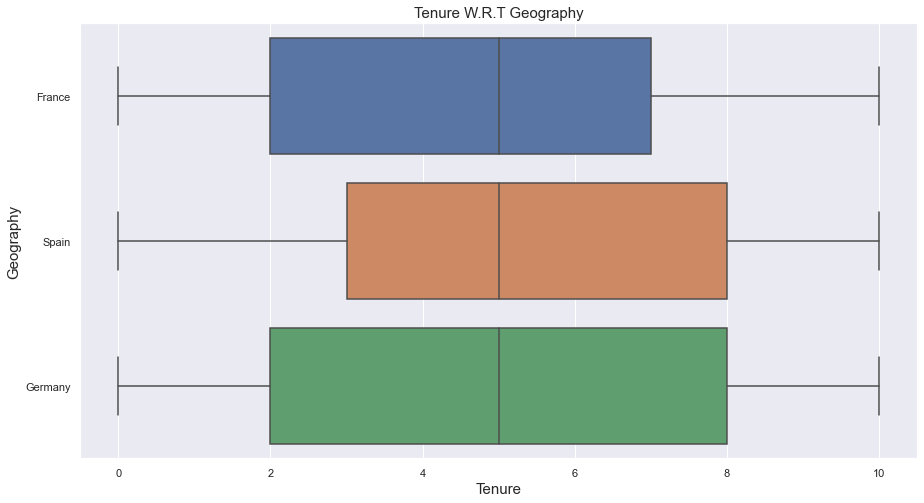

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Tenure', y='Geography', data=df)
plt.title('Tenure W.R.T Geography', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Geography', fontsize=15)
plt.show()

Let's check which country has the most number of products.

In [28]:
df["NumOfProducts"].unique()

array([1, 3, 2, 4], dtype=int64)

([<matplotlib.axis.YTick at 0x1bfa2314700>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

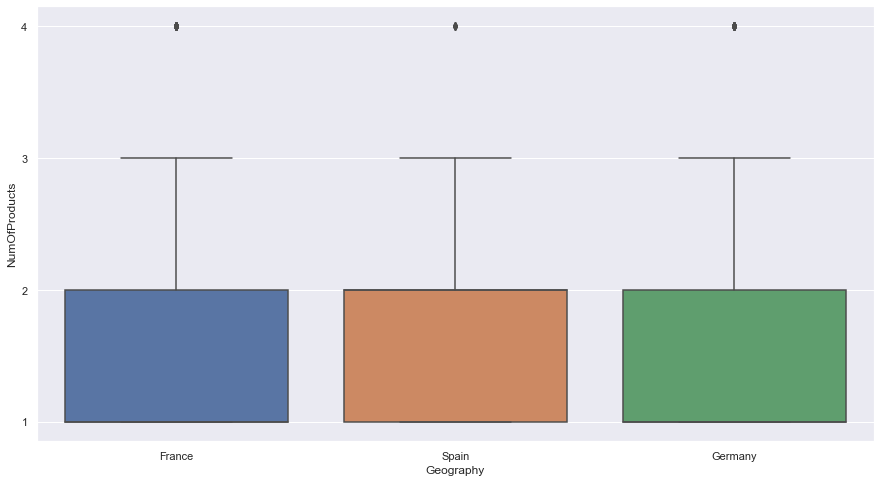

In [29]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Geography', y='NumOfProducts', data=df)
plt.yticks([1, 2, 3, 4])

Okay, this tells us no trends. For each country, the number of products is similar.

Let's now check with country has most credit cards.

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Figure size 1080x576 with 0 Axes>

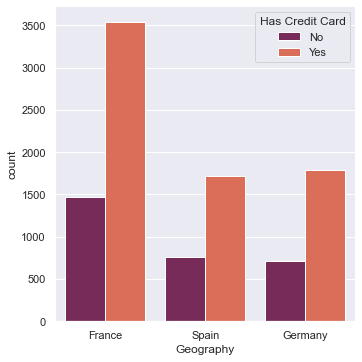

In [31]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='HasCrCard', data=df,legend=False,palette="rocket")
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

**Insights**: In each country, there are more people with a credit card then there are without.

Let's try to relate Geography with Churn/Exited.

<Figure size 1080x576 with 0 Axes>

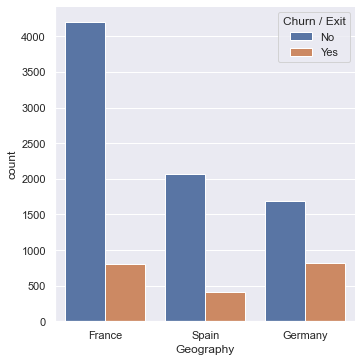

In [32]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='Exited', data=df, legend=False)
plt.legend(title='Churn / Exit', labels=['No', 'Yes'])
plt.show()

We can see similar trend in all the countries.

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

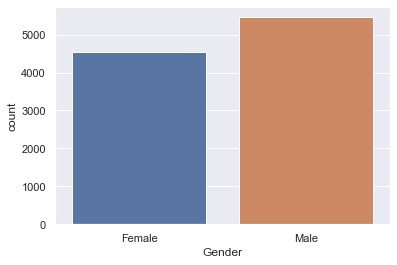

In [33]:
sns.countplot(x=df.Gender)

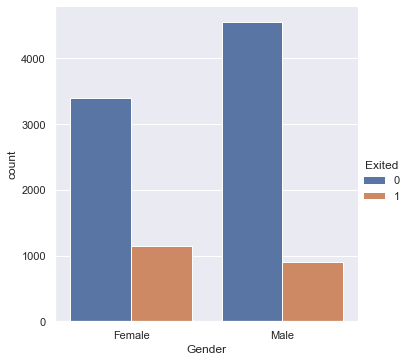

In [34]:
sns.catplot(x='Gender', hue='Exited', data=df, kind='count')

In both females and males, we can see that less people have churned.

### Age

In [35]:
df.Age.dtype

dtype('int64')

In [36]:
np.sort(df.Age.unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92], dtype=int64)

We have people of age between 18 and 92 inclusive.

Let's check the age bracket of those churned and those not churned.

<AxesSubplot:xlabel='Age', ylabel='Exited'>

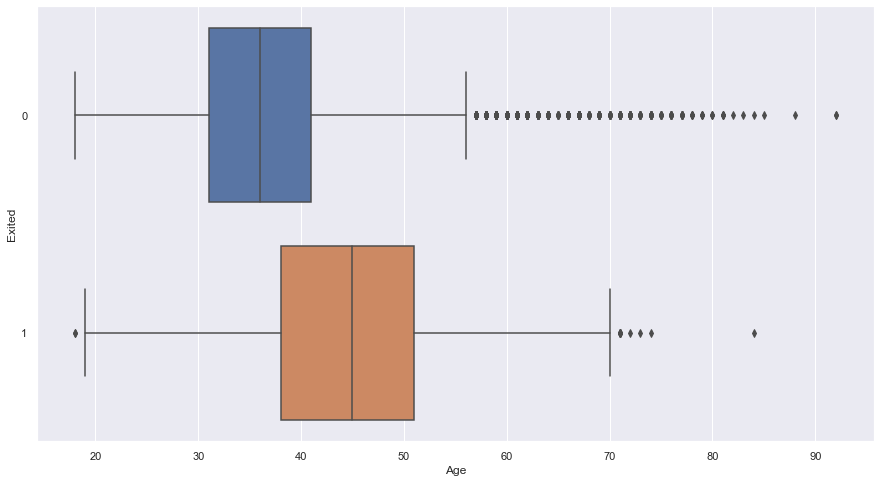

In [37]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df.Age, y=df.Exited, orient='h')

From the above box plot, we can see that mostly older people are the one who churns.

### Tenure

Let's look at the tenure's count ones again.

Text(0, 0.5, 'Count')

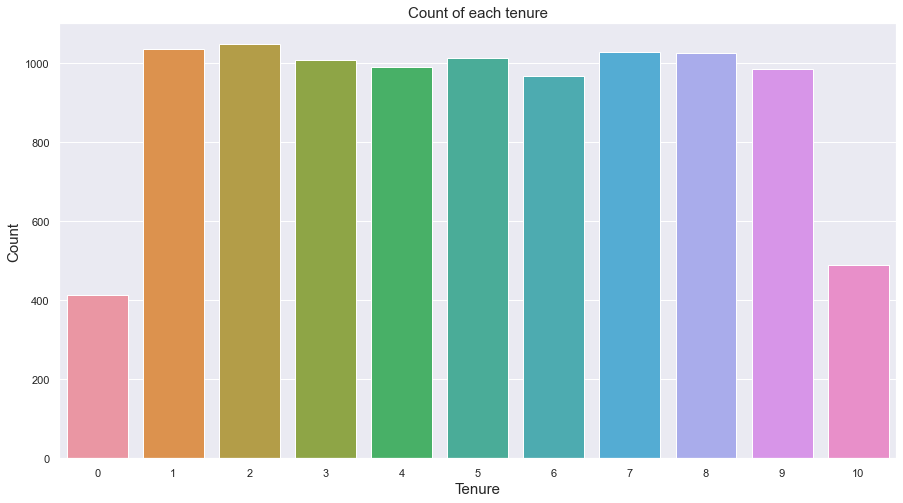

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Tenure)
plt.title('Count of each tenure', fontsize=15)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)

Now, let's check based on tenure's relation with churn.

<AxesSubplot:xlabel='Tenure', ylabel='Exited'>

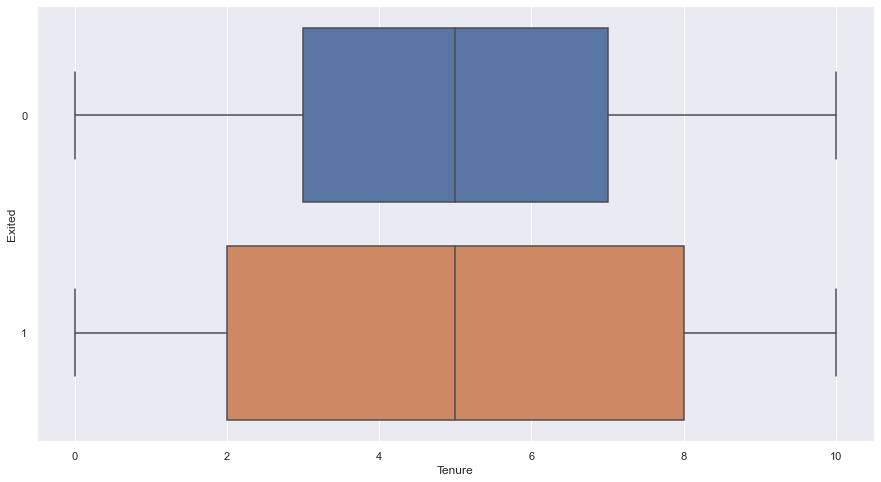

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Tenure', y='Exited', data=df, orient='h')

**Insights**: Box plots are kind of overlapping. Tenure years doesn't really matter when it comes to churn.

In [40]:
df[['Tenure', 'Exited']].corr()

,Tenure,Exited
Tenure,1.000000,-0.014001
Exited,-0.014001,1.000000


Correlation seems very less here.

### Balance

Let's first check the data type of balance.

In [41]:
df.Balance.dtype

dtype('float64')

In [42]:
df.Balance.head(10)

0         0.00
1     83807.86
2    159660.80
3         0.00
4    125510.82
5    113755.78
6         0.00
7    115046.74
8    142051.07
9    134603.88
Name: Balance, dtype: float64

In [43]:
df.Balance.median()

97198.54000000001

Let's check this with the response variable.

<AxesSubplot:xlabel='Balance', ylabel='Exited'>

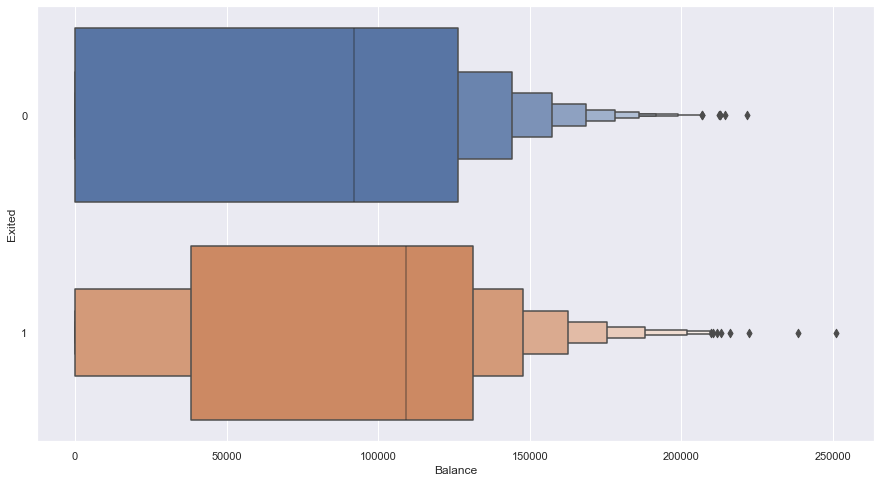

In [44]:
plt.figure(figsize=(15, 8))
sns.boxenplot(x='Balance', y='Exited', data=df, orient='h')

From the above boxen plots, we can see that trend is almost the same. However, some of the churns are from people having balance reaching 250000.

In [45]:
df[['Balance', 'Exited']].corr()

,Balance,Exited
Balance,1.000000,0.118533
Exited,0.118533,1.000000


### Number of Products

In [47]:
df.NumOfProducts.dtype

dtype('int64')

In [48]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

So, customers have at least 1 product and at most 4 products.

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

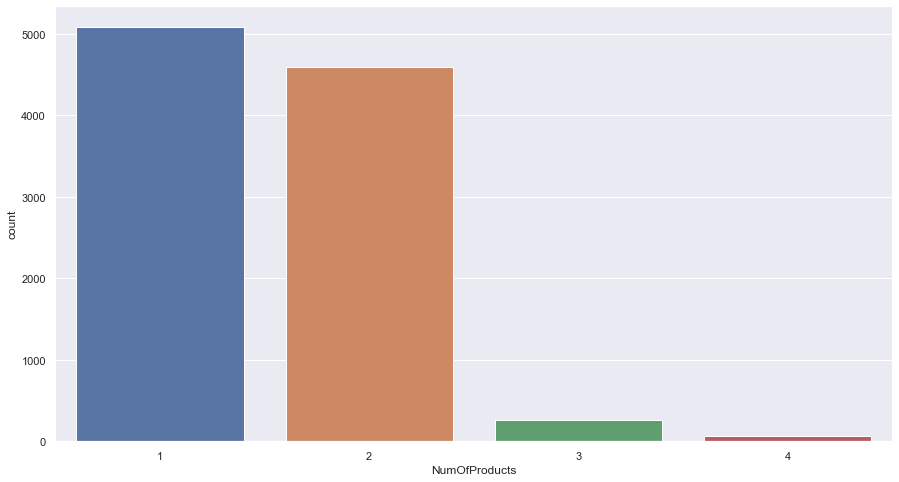

In [49]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.NumOfProducts)

Most customers own 1 or 2 products.

<AxesSubplot:xlabel='NumOfProducts', ylabel='Exited'>

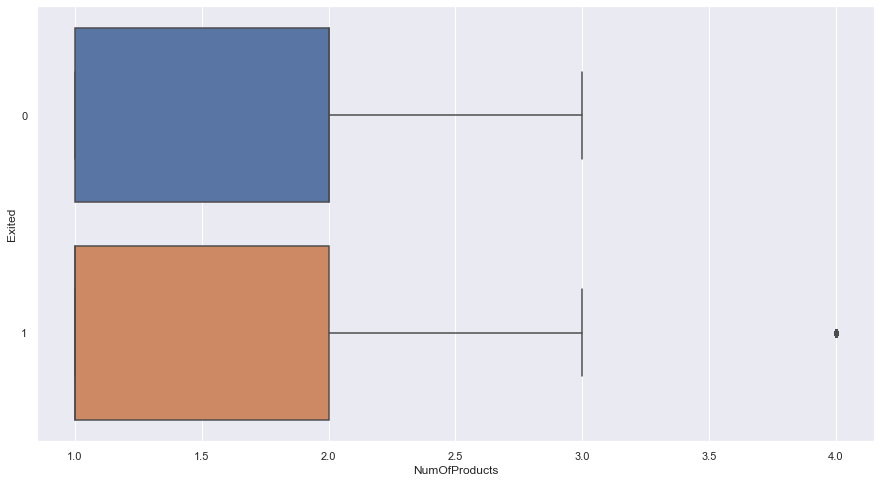

In [50]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=df.NumOfProducts, y=df.Exited, orient='h')

In [52]:
df[["NumOfProducts","Exited"]].corr()

,NumOfProducts,Exited
NumOfProducts,1.00000,-0.04782
Exited,-0.04782,1.00000


No correlation among number of products a customer has and his/her churn.

### HasCrCard (Has credit card)

Let's check if having a credit card affects a customer's churn behavior.

In [53]:
df.HasCrCard.unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

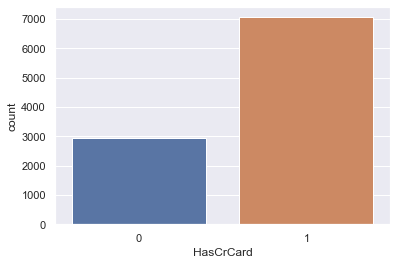

In [54]:
sns.countplot(x=df.HasCrCard)

More people have credit cards.

Now, let's check the relation of having a credit card with churn.

<Figure size 1080x576 with 0 Axes>

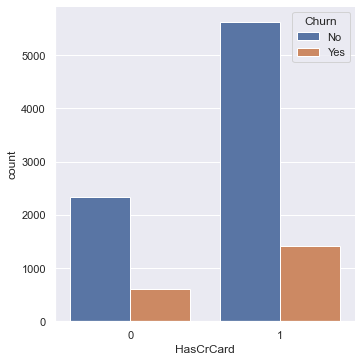

In [55]:
plt.figure(figsize=(15, 8))
sns.catplot(x='HasCrCard', hue='Exited', data=df, kind='count', legend=False)
plt.legend(title='Churn', labels=['No', 'Yes'])

No visible trend in this case too.

### Is Active Member

In [56]:
df.IsActiveMember.dtype

dtype('int64')

In [57]:
df.IsActiveMember.unique()

array([1, 0], dtype=int64)

<Figure size 1080x576 with 0 Axes>

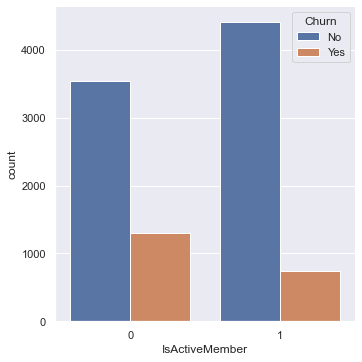

In [58]:
plt.figure(figsize=(15, 8))
sns.catplot(x='IsActiveMember', hue='Exited', data=df, kind='count', legend=False)
plt.legend(title='Churn', labels=['No', 'Yes'])

In [59]:
df[["IsActiveMember","Exited"]].corr()

,IsActiveMember,Exited
IsActiveMember,1.000000,-0.156128
Exited,-0.156128,1.000000


### Estimated Salary

In [60]:
df.EstimatedSalary.dtype

dtype('float64')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

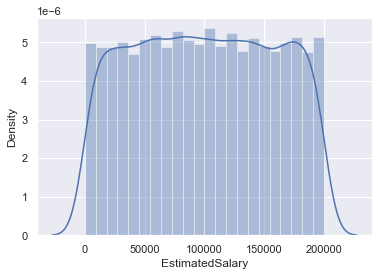

In [61]:
sns.distplot(df.EstimatedSalary)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Exited'>

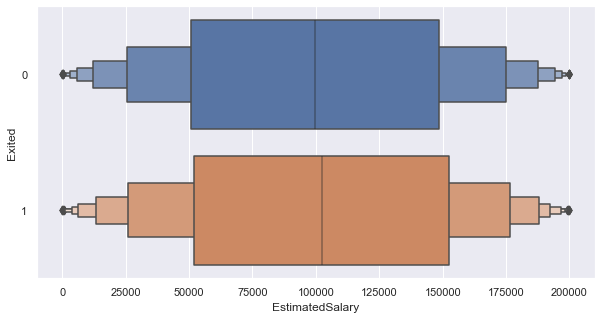

In [62]:
plt.figure(figsize=(10, 5))
sns.boxenplot(x=df.EstimatedSalary, y=df.Exited, orient='h')

# Conclusion

By looking at the data and exploring. We can see that none of the predictors have a relationship with 'Churn' enough to make predictions.